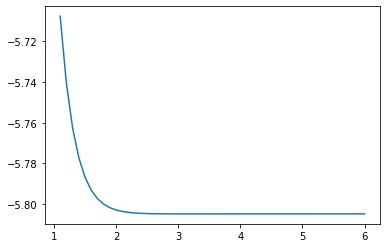

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("he_energy.csv")
plt.plot('r','energy', data=df)

Only use data at low energy; we don't need to fit to the very high energy data.

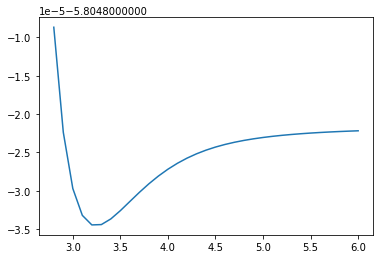

In [9]:
df =df[df.energy<-5.8048]
plt.plot('r','energy', data=df)

Eyeball 

In [12]:
from scipy.optimize import curve_fit
def lj(x, epsilon, sigma, e0):
    """
    x: distance between atoms
    sigma: 2^1/6 sigma is the equilibrium distance
    epsilon: well depth
    e0: offset energy
    """
    r6 = (sigma/x)**6
    return e0+4*epsilon *(r6*r6-r6)
p, cov = curve_fit(lj, xdata = df.r.values, ydata=df.energy.values, p0=(-1e-5, 3.0, -5.8048))

In [15]:
df['lj'] = lj(df.r, *p)
p

array([ 1.30705771e-05,  2.88636232e+00, -5.80482119e+00])

Text(0.5, 0, 'Distance (Angstrom)')

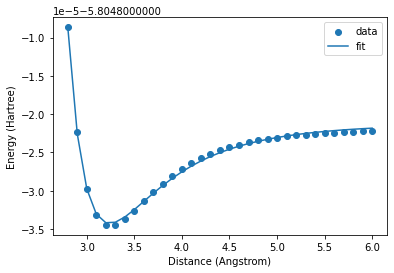

In [16]:
plt.scatter('r', 'energy', data=df, label='data')
plt.plot('r','lj',data =df, label='fit' )
plt.legend()
plt.ylabel("Energy (Hartree)")
plt.xlabel("Distance (Angstrom)")

In [17]:
print("RMS error", np.sqrt(np.mean((df.energy-df.lj)**2)))

RMS error 2.3372128287415393e-07
